# Workbook - data processing 

 Retrieving Data

H0 = There is no difference between big 5 testing scores in general population vs celebrities

H1 = There is a significant difference between big 5 testing scores in general population vs celebrities

EXT1    P   I am the life of the party.
EXT2    N   I don't talk a lot.
EXT3    P   I feel comfortable around people.
EXT4    N   I keep in the background.
EXT5    P   I start conversations.
EXT6    N   I have little to say.
EXT7    P   I talk to a lot of different people at parties.
EXT8    N   I don't like to draw attention to myself.
EXT9    P   I don't mind being the center of attention.
EXT10   N   I am quiet around strangers.
EST1    P   I get stressed out easily.
EST2    N   I am relaxed most of the time.
EST3    P   I worry about things.
EST4    N   I seldom feel blue.
EST5    P   I am easily disturbed.
EST6    P   I get upset easily.
EST7    P   I change my mood a lot.
EST8    P   I have frequent mood swings.
EST9    P   I get irritated easily.
EST10   P   I often feel blue.
AGR1    N   I feel little concern for others.
AGR2    P   I am interested in people.
AGR3    N   I insult people.
AGR4    P   I sympathize with others' feelings.
AGR5    N   I am not interested in other people's problems.
AGR6    P   I have a soft heart.
AGR7    N   I am not really interested in others.
AGR8    P   I take time out for others.
AGR9    P   I feel others' emotions.
AGR10   P   I make people feel at ease.
CSN1    P   I am always prepared.
CSN2    N   I leave my belongings around.
CSN3    P   I pay attention to details.
CSN4    N   I make a mess of things.
CSN5    P   I get chores done right away.
CSN6    N   I often forget to put things back in their proper place.
CSN7    P   I like order.
CSN8    N   I shirk my duties.
CSN9    P   I follow a schedule.
CSN10   P   I am exacting in my work.
OPN1    P   I have a rich vocabulary.
OPN2    N   I have difficulty understanding abstract ideas.
OPN3    P   I have a vivid imagination.
OPN4    N   I am not interested in abstract ideas.
OPN5    P   I have excellent ideas.
OPN6    N   I do not have a good imagination.
OPN7    P   I am quick to understand things.
OPN8    P   I use difficult words.
OPN9    P   I spend time reflecting on things.
OPN10   P   I am full of ideas.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import os
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import geopandas as gpd
import pycountry

In [2]:
#General population Big 5 results 
general = pd.read_csv('../data/datageneral.csv', sep='\t')

In [3]:
#Exploring data - general 
general.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [4]:
#Exploring data - general; NAAN
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [5]:
#Cleaning - general 
#5 categories : op; co; ex; ag; ne
#1 = disagree; 3 = neutral; 5 = agree
start_rows = len(general)
general = general.replace(0, np.nan).dropna(axis=0).reset_index(drop=True)
remove_rows = start_rows - len(general)
print('Removed', remove_rows ,'rows that had incomplete pieces of data.')
print('This was', (remove_rows/start_rows * 100),'of the total data.')
print('Number of countries:', len(set(general.country.values)))

Removed 149057 rows that had incomplete pieces of data.
This was 14.680486654237345 of the total data.
Number of countries: 223


In [6]:
country_dict = {i.alpha_2: i.alpha_3 for i in pycountry.countries}
countries = pd.DataFrame(general.country.value_counts()).T\
              .drop('NONE', axis=1)\
              .rename(columns=country_dict, index={'country': 'count'})
countries_rank = countries.T.rename_axis('iso_a3').reset_index()
countries_rank['rank'] = countries_rank['count'].rank()
countries_rank.T

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
iso_a3,USA,GBR,CAN,AUS,PHL,IND,DEU,NZL,MYS,MEX,...,TCD,BDI,COM,BEN,BFA,GIN,FLK,GNQ,MHL,SHN
count,468888,57371,53258,42935,16286,13640,12306,11205,9734,9298,...,1,1,1,1,1,1,1,1,1,1
rank,222,221,220,219,218,217,216,215,214,213,...,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5


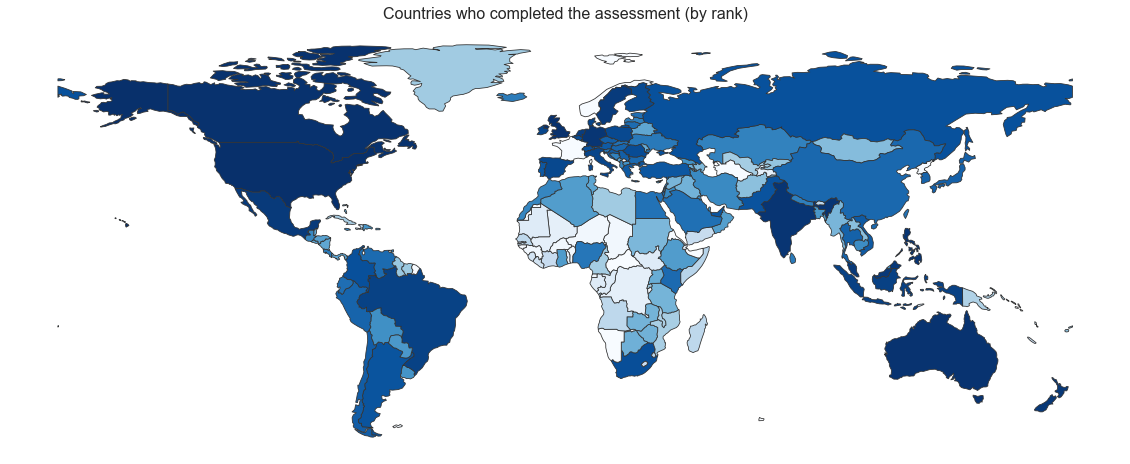

In [145]:
sns.set_style("white")

file = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(file)
world = pd.merge(world, right=countries_rank, how='left', on='iso_a3').fillna(0)
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Countries who completed the assessment (by rank)', size=16)
world.drop(159).plot(column='rank', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.2'); sns.set()
plt.box(on=None)

#twilight', 
#'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
# 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix',

In [23]:
#Former research 
pos_questions = [ # positive questions adding to the trait.
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # 5 Extroversion
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # 8 Neuroticism
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # 6 Agreeableness
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # 6 Conscientiousness
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # 7 Openness
]
neg_questions = [ # negative (negating) questions subtracting from the trait.
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5 Extroversion
    'EST2','EST4',                       # 2 Neuroticism
    'AGR1','AGR3','AGR5','AGR7',         # 4 Agreeableness
    'CSN2','CSN4','CSN6','CSN8',         # 4 Conscientiousness
    'OPN2','OPN4','OPN6',                # 3 Openness
]

general[pos_questions] = general[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
general[neg_questions] = general[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})
cols = pos_questions + neg_questions
general = general[sorted(cols)]
general.head()

,AGR1,AGR10,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,...,OPN1,OPN10,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9
0,2.0,-2.0,-1.0,2.0,-2.0,2.0,0.0,2.0,-2.0,0.0,...,-1.0,-1.0,1.0,-2.0,1.0,-2.0,1.0,-1.0,0.0,-2.0
1,1.0,0.0,-2.0,1.0,-1.0,1.0,-1.0,0.0,-2.0,-1.0,...,-2.0,0.0,2.0,-2.0,2.0,0.0,1.0,-2.0,-1.0,-1.0
2,1.0,0.0,-2.0,1.0,-2.0,2.0,-2.0,1.0,-2.0,-2.0,...,-1.0,-2.0,1.0,-1.0,1.0,-2.0,2.0,-1.0,0.0,-2.0
3,2.0,-2.0,-2.0,0.0,-2.0,2.0,-2.0,2.0,-2.0,0.0,...,-2.0,0.0,2.0,-1.0,2.0,0.0,1.0,-2.0,-2.0,0.0
4,1.0,0.0,-1.0,1.0,-1.0,1.0,0.0,1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,0.0,-1.0


In [91]:
traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
#trait_labels = ['Extroversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']
for trait in traits:
    trait_cols = sorted([col for col in general.columns if trait in col and '_E' not in col])
    general[trait] = general[trait_cols].sum(axis=1)
general[traits].head(10)

#add neuroticism --> if added shows 0 overall; issues here --> add manually  

,EXT,EST,AGR,CSN,OPN
0,0.0,-16.0,4.0,-20.0,-24.0
1,-40.0,-18.0,-16.0,4.0,-12.0
2,-28.0,-18.0,-20.0,-8.0,-20.0
3,-20.0,-6.0,-16.0,-40.0,-8.0
4,-16.0,-28.0,0.0,-4.0,-12.0
5,-8.0,-14.0,4.0,-4.0,-16.0
6,-28.0,-22.0,-24.0,-12.0,-32.0
7,24.0,-28.0,-16.0,0.0,-20.0
8,-44.0,-4.0,-44.0,-52.0,0.0
9,-12.0,-20.0,-4.0,-52.0,-16.0


In [ ]:
bycountry= general[general['Country']][['AGR1']]
bycountry.pivot_table(index='Country', columns='Description', aggfunc='sum').iplot(kind='bar',
              title='Revenue per Country per Products')

In [79]:
#Celebrities Big 5 results 
celebrities = pd.read_csv('../data/datatwitter.csv')

In [80]:
#Explore
celebrities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


In [81]:
#Cleaning - celebrities
start_rows2 = len(general)
celebrities = celebrities.replace(0, np.nan).dropna(axis=0).reset_index(drop=True)
remove_rows2 = start_rows2 - len(general)
print('Removed', remove_rows2 ,'rows that had incomplete pieces of data.')
print('This was', (remove_rows2/start_rows2 * 100),'% of the total data.')

Removed 0 rows that had incomplete pieces of data.
This was 0.0 % of the total data.


In [92]:
#Renaming columns to match - general 
#trait_labels = ['Extroversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']
generaltrait = pd.DataFrame(general[traits])
generaltrait.rename({'EXT': 'EXT_GEN', 'EST': 'NEU_GEN', 'AGR': 'AGR_GEN', 'CSN': 'CSN_GEN', 'OPN':'OPN_GEN'}, axis=1, inplace=True)
generaltrait.head()

,EXT_GEN,NEU_GEN,AGR_GEN,CSN_GEN,OPN_GEN
0,0.0,-16.0,4.0,-20.0,-24.0
1,-40.0,-18.0,-16.0,4.0,-12.0
2,-28.0,-18.0,-20.0,-8.0,-20.0
3,-20.0,-6.0,-16.0,-40.0,-8.0
4,-16.0,-28.0,0.0,-4.0,-12.0


In [141]:
generaltrait1 =generaltrait
generaltrait1['index_col'] = generaltrait.index
generaltrait.pivot_table(index=['index_col'],values=['EXT_GEN'], aggfunc={np.mean,np.std})

,EXT_GEN
,mean
index_col,
0,0.0
1,-40.0
2,-28.0
3,-20.0
4,-16.0
...,...
866279,-16.0
866280,-28.0


In [95]:
#Renaming columns to match - celebrities 
celebrities.rename({'op': 'OPN_CEL', 'ex': 'EXT_CEL', 'ne':'NEU_CEL', 'ag':'AGR_CEL', 'co': 'CSN_CEL'}, axis=1, inplace=True)
celebrities.head()

,usuario,OPN_CEL,CSN_CEL,EXT_CEL,AGR_CEL,NEU_CEL,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


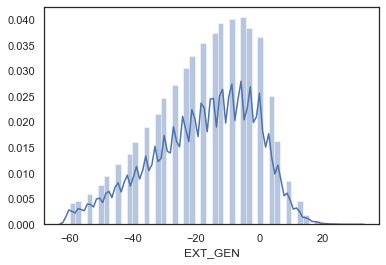

In [86]:
#Overall trait visualization: general vs celebrities: 'Extroversion'
#fig, ax =plt.subplots(1,2)
#sns.distplot(generaltrait['EXT_GEN'], ax=ax[0])
#sns.distplot(celebrities['EXT_CEL']), ax=ax[1])
#fig.show()
sns.distplot(generaltrait['EXT_GEN'])

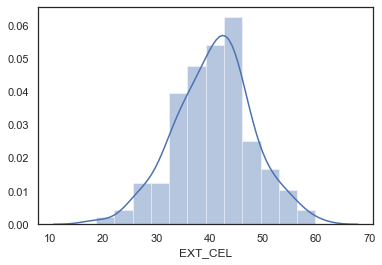

In [75]:
#Overall trait visualization: general vs celebrities: 'Extroversion'
sns.distplot(celebrities['EXT_CEL'])

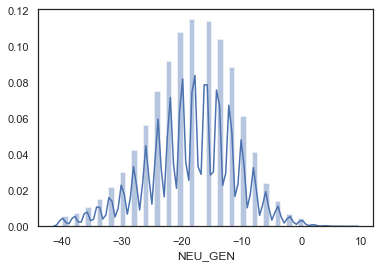

In [93]:
#Overall trait visualization: general vs celebrities:  'Neuroticism'
sns.distplot(generaltrait['NEU_GEN'])

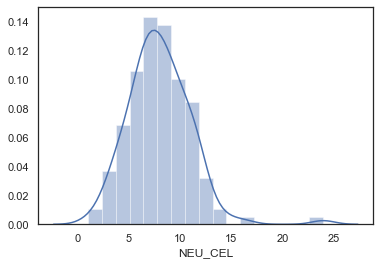

In [96]:
sns.distplot(celebrities['NEU_CEL'])

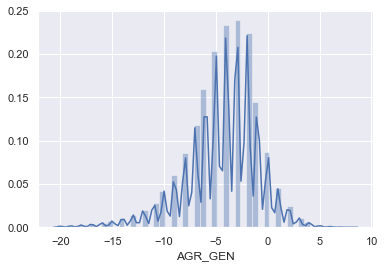

In [33]:
#Overall trait visualization: general vs celebrities: 'Agreeableness'
sns.distplot(generaltrait['AGR_GEN'])

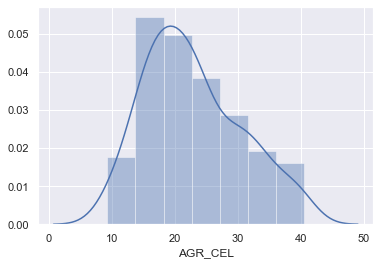

In [34]:
sns.distplot(celebrities['AGR_CEL'])

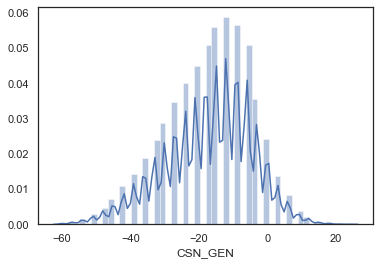

In [87]:
#Overall trait visualization: general vs celebrities: 'Conscientiousness'
sns.distplot(generaltrait['CSN_GEN'])
#sns.distplot(celebrities['CSN_CEL'])

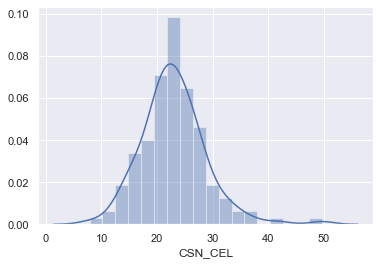

In [36]:
sns.distplot(celebrities['CSN_CEL'])

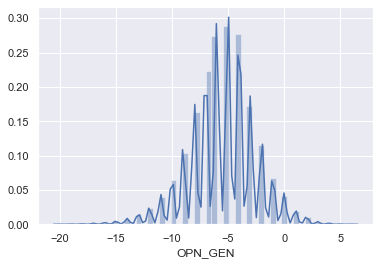

In [37]:
#Overall trait visualization: general vs celebrities: 'Openness'
sns.distplot(generaltrait['OPN_GEN'])

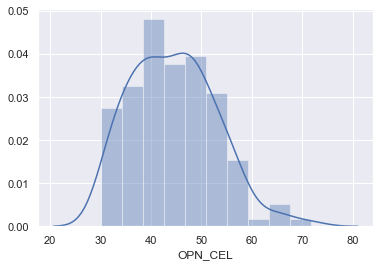

In [39]:
sns.distplot(celebrities['OPN_CEL'])

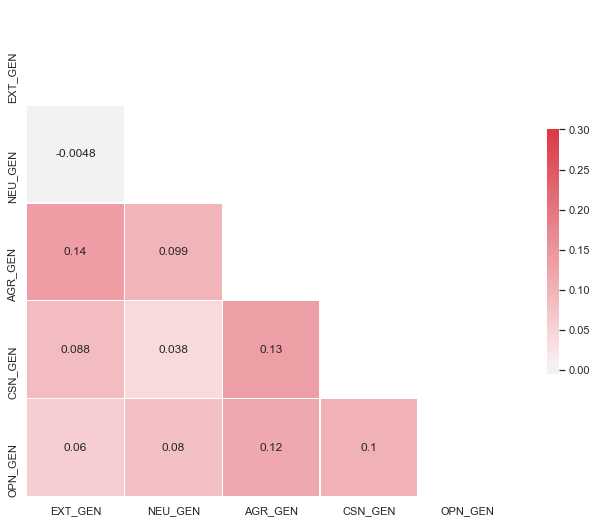

In [99]:
#Correlation Vizualization - general - Matrix
# your code here
sns.set(style="white")
# Compute the correlation matrix
corr = generaltrait.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

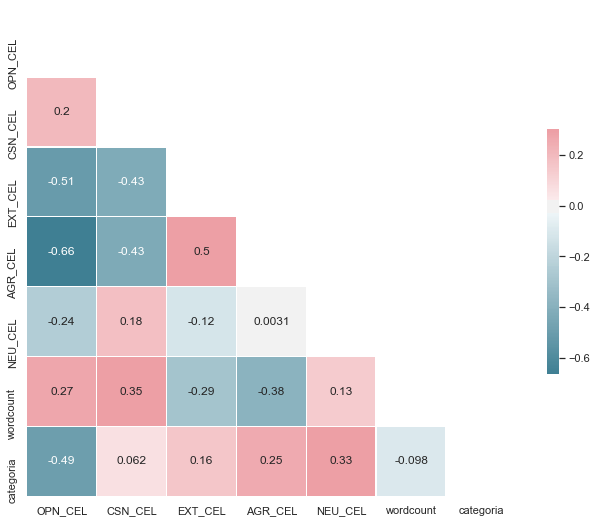

In [98]:
#Correlation Vizualization - celebrities - Matrix 
# your code here
sns.set(style="white")
# Compute the correlation matrix
corr = celebrities.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
#should drop the unnecc cols 

In [46]:
#Joining dataframes 
#total = generaltrait.append(celebrities, sort=False)
#total.head()
#generaltrait.corrwith(celebrities, axis = 1) 
#different lenghts; won't work 

In [61]:
#Joining dataframes 
#Creating mean values columns - generaltraits
generalmeans = pd.DataFrame(generaltrait.mean().to_dict(),index=[generaltrait.index.values[-1]])
#generalmeans.head()
#new_df.rename(columns=lambda c: "mean_"+str(c))
#Creating mean values columns - celebrities
celebritiesmeans = pd.DataFrame(celebrities.mean().to_dict(),index=[celebrities.index.values[-1]])
#celebritiesmeans.head()
#Joining into one df 
#total = generalmeans.append(celebritiesmeans, sort=False)
#total = pd.concat([generalmeans, celebritiesmeans], ignore_index=True)
#total.head()

In [143]:
#generalmeans = pd.DataFrame(generaltrait.mean().to_dict(),index=[generaltrait.index.values[-1]])
#generalmeans.rename({'OPN_CEL', 'ex': 'EXT_CEL', 'ne':'NEU_CEL', 'ag':'AGR_CEL', 'co': 'CSN_CEL'}, axis=1, inplace=True)
generaltrait.mean(axis = 0)
#generalmeans.columns = ['EXT', 'NEU', 'AGR', 'CSN', 'OPN', 'NE']
#generalmeans.head()


EXT_GEN         -23.447110
NEU_GEN         -18.469867
AGR_GEN         -17.496258
CSN_GEN         -22.931842
OPN_GEN         -22.006012
index_col    433141.500000
dtype: float64

In [110]:
#check
#generaltrait.mean(axis = 0)
generalmeans2 = pd.DataFrame(generaltrait.mean(axis = 0).to_dict(), index = generaltrait.index.values)
generalmeans2.head()

,EXT_GEN,NEU_GEN,AGR_GEN,CSN_GEN,OPN_GEN
0,-23.44711,-18.469867,-17.496258,-22.931842,-22.006012
1,-23.44711,-18.469867,-17.496258,-22.931842,-22.006012
2,-23.44711,-18.469867,-17.496258,-22.931842,-22.006012
3,-23.44711,-18.469867,-17.496258,-22.931842,-22.006012
4,-23.44711,-18.469867,-17.496258,-22.931842,-22.006012


In [142]:
generaltrait.std(axis = 0)

EXT_GEN          21.631137
NEU_GEN           7.438918
AGR_GEN          13.960204
CSN_GEN          16.937072
OPN_GEN          11.725918
index_col    250074.794636
dtype: float64

In [116]:
celebritiesmeans = pd.DataFrame(celebrities.mean(axis = 0).to_dict(),index= celebrities.index.values)
#celebritiesmeans.columns = ['OPN','CSN', 'EXT', 'AGR','NEU', 'x', 'y']
celebritiesmeans.head()
#generalmeans.corrwith(celebritiesmeans, axis = 1) 
#need to recount the scores

,OPN_CEL,CSN_CEL,EXT_CEL,AGR_CEL,NEU_CEL,wordcount,categoria
0,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.05
1,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.05
2,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.05
3,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.05
4,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.05


In [113]:
celebrities.mean(axis = 0)

OPN_CEL      44.414591
CSN_CEL      22.977135
EXT_CEL      40.764428
AGR_CEL      22.918528
NEU_CEL       8.000098
wordcount    98.715484
categoria     4.050000
dtype: float64

In [144]:
celebrities.std(axis = 0)

OPN_CEL       8.425723
CSN_CEL       5.816851
EXT_CEL       7.185246
AGR_CEL       7.657122
NEU_CEL       3.039248
wordcount    44.714071
categoria     2.658839
dtype: float64

In [ ]:
#Correlation testing - correlation matrix 
#generalmeans.corrwith(celebritiesmeans, axis = 0) 

In [119]:
#Extroversion 
EXT1= generaltrait["EXT_GEN"]
EXT2= celebrities["EXT_CEL"]
EXTcorrelation = EXT1.corr(EXT2)
print('EXT Correlation:', EXTcorrelation)

EXT Correlation: 0.21802594647423937


In [120]:
#Openess 
OPN1= generaltrait["OPN_GEN"]
OPN2= celebrities["OPN_CEL"]
OPNcorrelation = OPN1.corr(OPN2)
print('OPN Correlation:', OPNcorrelation)

OPN Correlation: -0.014111553486380627


In [121]:
#Agreeableness 
AGR1= generaltrait["AGR_GEN"]
AGR2= celebrities["AGR_CEL"]
AGRcorrelation = AGR1.corr(AGR2)
print('AGR Correlation:', AGRcorrelation)

AGR Correlation: 0.22046576971061324


In [122]:
#Conscientiousness 
CSN1= generaltrait["CSN_GEN"]
CSN2= celebrities["CSN_CEL"]
CSNcorrelation = CSN1.corr(CSN2)
print('CSN Correlation:', CSNcorrelation)

CSN Correlation: -0.15682956857979008


In [123]:
#Neuroticism 
NEU1= generaltrait["NEU_GEN"]
NEU2= celebrities["NEU_CEL"]
NEUcorrelation = NEU1.corr(NEU2)
print('NEU Correlation:', NEUcorrelation)

NEU Correlation: 0.07296940992438891


In [128]:
# Correlation testing - test choice 
#Type of values: Ordinal [testing scale 1 - 3- 5]
#Purpose: Examining differences between populations
#Measuring: Independent values 
#Using: Mann-Whitney U test
#Difference between MW & t-test: T-test is parametric; WMW is for non-parametric. 
from scipy.stats import mannwhitneyu

EXTMWT = mannwhitneyu(generaltrait["EXT_GEN"], celebrities["EXT_CEL"])
print ('Extroversion MW:', EXTMWT)
OPNMWT = mannwhitneyu(generaltrait["OPN_GEN"], celebrities["OPN_CEL"])
print ('Openess MW:', OPNMWT)
AGRMWT = mannwhitneyu(generaltrait["AGR_GEN"], celebrities["AGR_CEL"])
print ('Agreeableness MW:', AGRMWT)
CSNMWT = mannwhitneyu(generaltrait["CSN_GEN"], celebrities["CSN_CEL"])
print ('Conscentiousness MW:', CSNMWT)
NEUMWT = mannwhitneyu(generaltrait["NEU_GEN"], celebrities["NEU_CEL"])
print ('Neuroticism MW:', NEUMWT )

Extroversion MW: MannwhitneyuResult(statistic=10327.0, pvalue=6.938745556158234e-94)
Openess MW: MannwhitneyuResult(statistic=0.0, pvalue=8.56237103500198e-95)
Agreeableness MW: MannwhitneyuResult(statistic=215015.0, pvalue=6.892266626769745e-94)
Conscentiousness MW: MannwhitneyuResult(statistic=177202.0, pvalue=1.399562072421502e-93)
Neuroticism MW: MannwhitneyuResult(statistic=7016.0, pvalue=3.009390304826915e-94)


In [130]:
from ipywidgets import interact

In [136]:
@interact(EXTGEN1=generaltrait['EXT_GEN'].unique(), 
          EXTCEB1= celebrities['EXT_CEL'].unique())

def linechart(EXTGEN1, EXTCEB1):
    df = generaltrait[(generaltrait['EXT_GEN']) & (celebrities['EXT_CEL'])
    grouped= generaltrait.groupby('OPN_GEN').agg('sum')['OPN_GEN']
    grouped.iplot(kind='line', title='xyz')

SyntaxError: invalid syntax (<ipython-input-136-d4d85f4f8e04>, line 6)